## **<span style="color:red">Importing Data and Libraries</span>**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"../cleaned_railway.csv")
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30098 entries, 0 to 30097
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction ID       30098 non-null  object 
 1   Date of Purchase     30098 non-null  object 
 2   Time of Purchase     30098 non-null  object 
 3   Purchase Type        30098 non-null  object 
 4   Payment Method       30098 non-null  object 
 5   Railcard             30098 non-null  object 
 6   Ticket Class         30098 non-null  object 
 7   Ticket Type          30098 non-null  object 
 8   Price                30098 non-null  int64  
 9   Departure Station    30098 non-null  object 
 10  Arrival Destination  30098 non-null  object 
 11  Date of Journey      30098 non-null  object 
 12  Departure Time       30098 non-null  object 
 13  Arrival Time         30098 non-null  object 
 14  Actual Arrival Time  28296 non-null  object 
 15  Journey Status       30098 non-null 

(None,
             Transaction ID Date of Purchase Time of Purchase Purchase Type  \
 0  da8a6ba8-b3dc-4677-b176        12/8/2023         12:41:11        Online   
 1  b0cdd1b0-f214-4197-be53       12/16/2023         11:23:01       Station   
 2  f3ba7a96-f713-40d9-9629       12/19/2023         19:51:27        Online   
 3  b2471f11-4fe7-4c87-8ab4       12/20/2023         23:00:36       Station   
 4  2be00b45-0762-485e-a7a3       12/27/2023         18:22:56        Online   
 
   Payment Method              Railcard Ticket Class Ticket Type  Price  \
 0    Contactless                 Adult     Standard     Advance     43   
 1    Credit Card                 Adult     Standard     Advance     23   
 2    Credit Card  Don't have rail card     Standard     Advance      3   
 3    Credit Card  Don't have rail card     Standard     Advance     13   
 4    Contactless  Don't have rail card     Standard     Advance     76   
 
        Departure Station    Arrival Destination Date of Journey 

## **<span style="color:red">What happened?</span>**

# What are the most used routes (the stations people depart from and arrive at)?

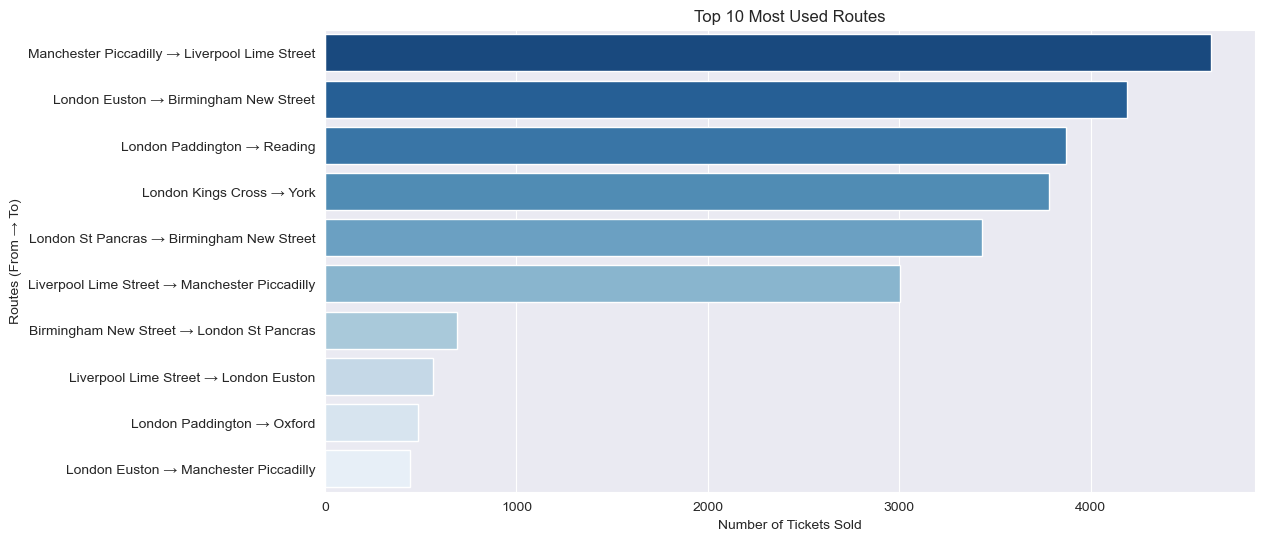

In [8]:
# Count occurrences of each route
route_counts = (df.groupby(['Departure Station', 'Arrival Destination'])
               .size()
               .reset_index(name='Count')
               .sort_values('Count', ascending=False)
               .head(10))

# Create the visualization
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Create combined route names
route_counts['Route'] = route_counts['Departure Station'] + " → " + route_counts['Arrival Destination']

sns.barplot(x="Count", 
            y="Route", 
            hue="Route",
            data=route_counts, 
            palette="Blues_r", 
            dodge=False, 
            legend=False)

plt.xlabel("Number of Tickets Sold")
plt.ylabel("Routes (From → To)")
plt.title("Top 10 Most Used Routes")

plt.show()

# What percentage of tickets are sold online, and what percentage are sold at the station?

Percentage of Tickets by Purchase Type:
Purchase Type
Online     59.608612
Station    40.391388
Name: proportion, dtype: float64


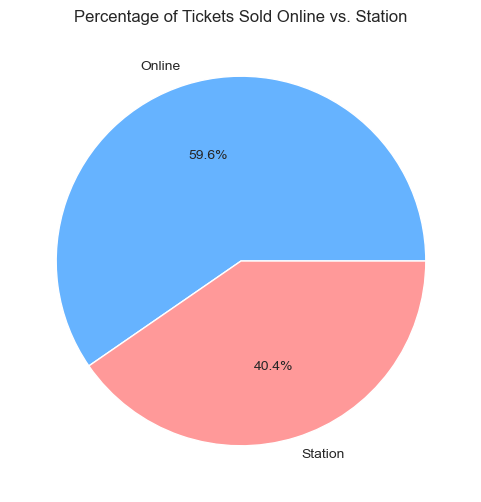

In [10]:
purchase_counts = df["Purchase Type"].value_counts(normalize=True) * 100
print("Percentage of Tickets by Purchase Type:")
print(purchase_counts)
plt.figure(figsize=(6, 6))
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', colors=["#66b3ff", "#ff9999"])
plt.title("Percentage of Tickets Sold Online vs. Station")
plt.show()

# What percentage of tickets are sold online, and what percentage are sold at the station?

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3904\3269118133.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_hours.index, y=purchase_hours.values, palette=bar_colors)


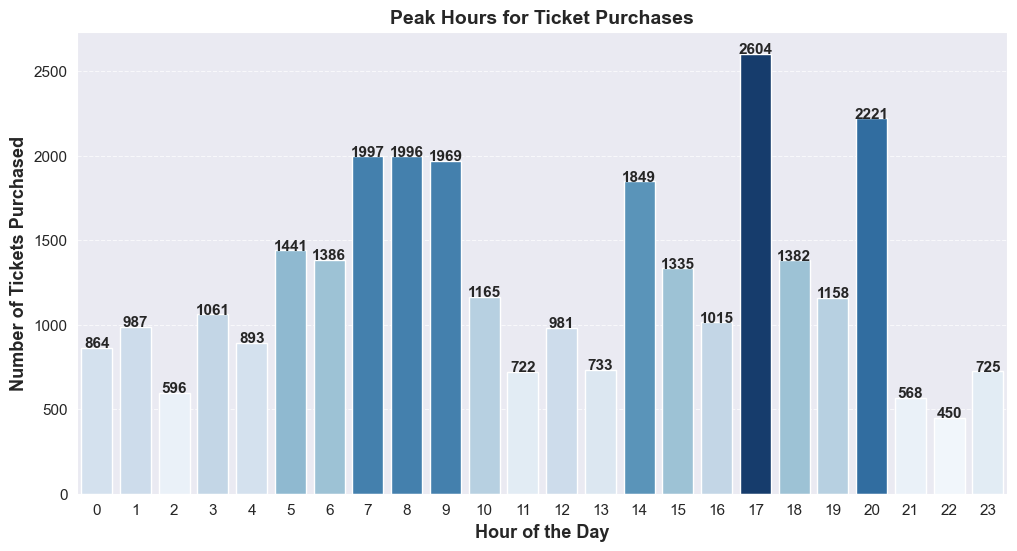

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df["Hour of Purchase"] = pd.to_datetime(df["Time of Purchase"], format="%H:%M:%S").dt.hour
purchase_hours = df["Hour of Purchase"].value_counts().sort_index()

norm = (purchase_hours - purchase_hours.min()) / (purchase_hours.max() - purchase_hours.min())  # Normalization
colors = sns.color_palette("Blues", len(purchase_hours))  # Palette من الأزرق (العادي)
bar_colors = [colors[int(i * (len(colors) - 1))] for i in norm]  # تعيين اللون بناءً على القيمة (عكس التدرج السابق)

plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_hours.index, y=purchase_hours.values, palette=bar_colors)

for x, y in zip(purchase_hours.index, purchase_hours.values):
    plt.text(x, y + 1, str(y), ha="center", fontsize=11, fontweight="bold")

plt.xlabel("Hour of the Day", fontsize=13, fontweight="bold")
plt.ylabel("Number of Tickets Purchased", fontsize=13, fontweight="bold")
plt.xticks(range(0, 24), fontsize=11)
plt.yticks(fontsize=11)
plt.title("Peak Hours for Ticket Purchases", fontsize=14, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


# Average ticket prices by class/type?

Average Price by Ticket Class and Type:
  Ticket Class Ticket Type      Price
0  First Class     Advance  32.606538
1  First Class     Anytime  41.156863
2  First Class    Off-Peak  40.708268
3     Standard     Advance  14.547061
4     Standard     Anytime  23.565747
5     Standard    Off-Peak  17.485991


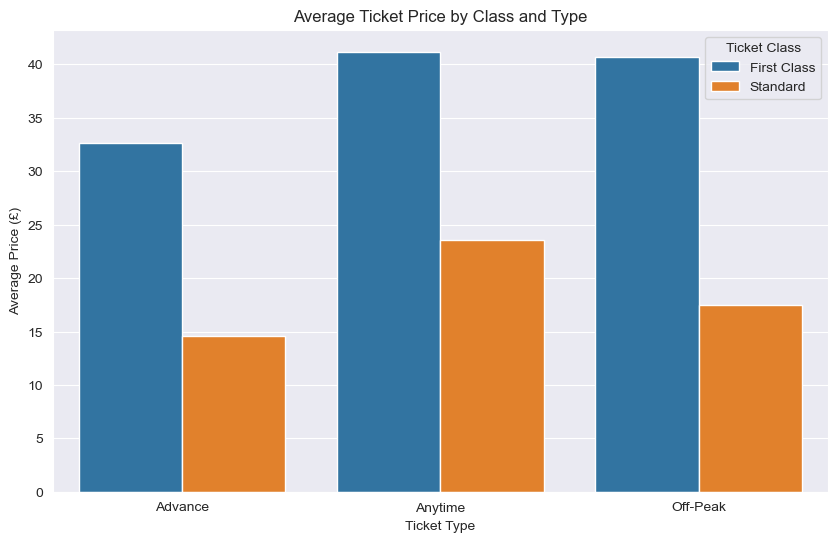

In [14]:
avg_price_by_class_type = df.groupby(['Ticket Class', 'Ticket Type'])['Price'].mean().reset_index()
print("Average Price by Ticket Class and Type:")
print(avg_price_by_class_type)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Ticket Type', y='Price', hue='Ticket Class', data=avg_price_by_class_type)
plt.title('Average Ticket Price by Class and Type')
plt.ylabel('Average Price (£)')
plt.show()

# Distribution of Payment Methods

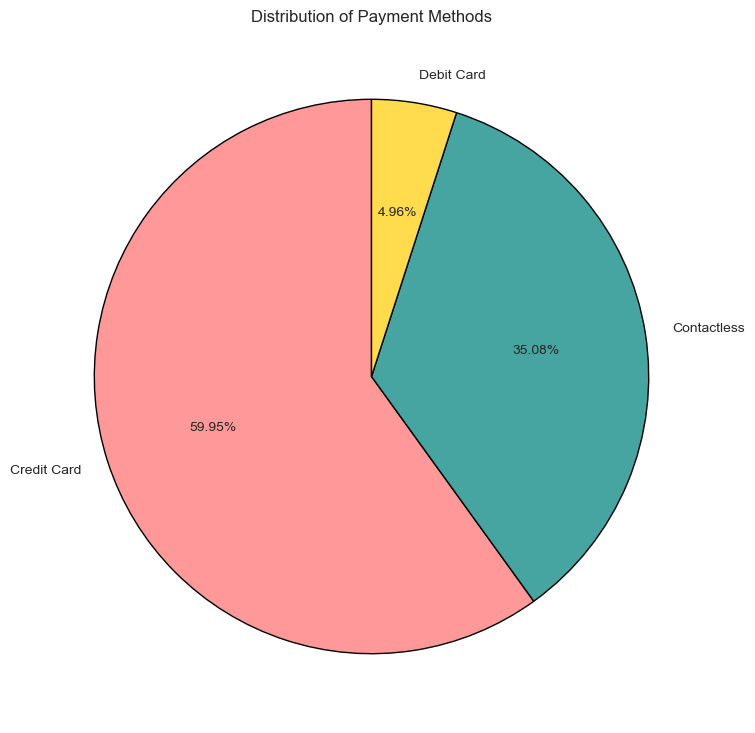

In [16]:
# Define custom colors with a lighter alternative to purple
custom_colors = ["#ff9999", "#46a5a0", "#ffdb4d"]  # Light red, teal, and soft yellow
# Set figure size
plt.figure(figsize=(9, 9))
df["Payment Method"].value_counts().plot.pie(
    autopct="%2.2f%%",
    colors=custom_colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Distribution of Payment Methods")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()


# Price difference by payment method?

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3904\3798715460.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Payment Method", y="Price", data=df, palette="viridis", inner="quartile")


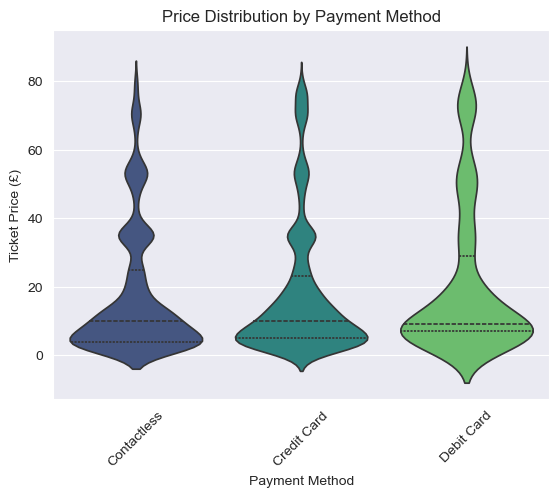

In [18]:
sns.violinplot(x="Payment Method", y="Price", data=df, palette="viridis", inner="quartile")

# Labels and title
plt.xlabel("Payment Method")
plt.ylabel("Ticket Price (£)")
plt.title("Price Distribution by Payment Method")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Stations with most delays?

Top 5 Stations with Most Delays:
Departure Station
Liverpool Lime Street    515
Manchester Piccadilly    463
London Euston            259
Birmingham New Street    138
London Kings Cross       128
Name: count, dtype: int64


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3904\2286045518.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_stations.values, y=delayed_stations.index, palette="Reds_r")


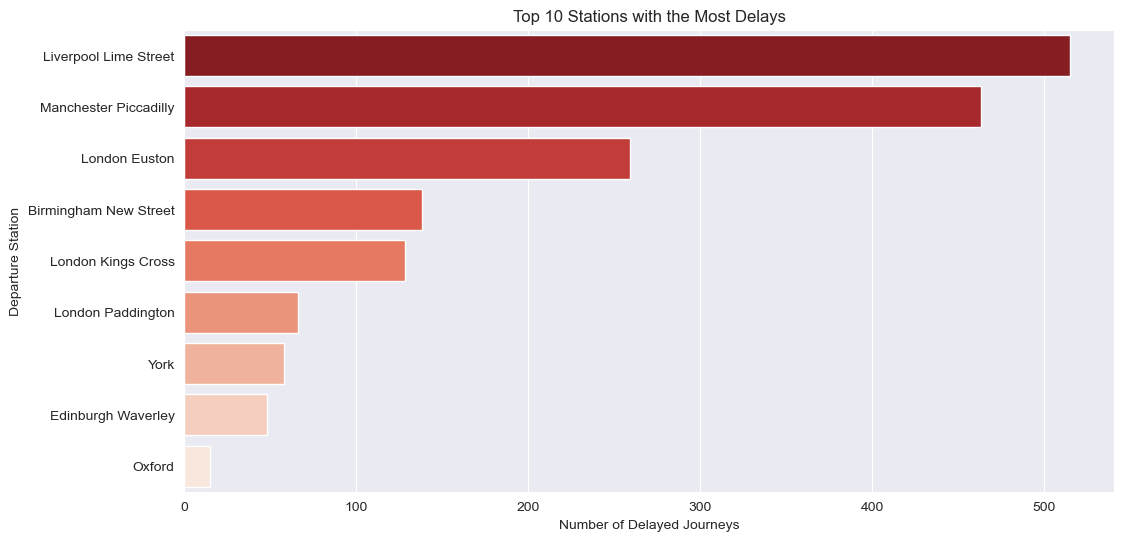

In [20]:
delayed_df = df[df["Journey Status"] == "Delayed"]

delay_by_station = delayed_df["Departure Station"].value_counts().nlargest(5)
print("Top 5 Stations with Most Delays:")
print(delay_by_station)

delayed_stations = df[df["Journey Status"] == "Delayed"]["Departure Station"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=delayed_stations.values, y=delayed_stations.index, palette="Reds_r")
plt.xlabel("Number of Delayed Journeys")
plt.ylabel("Departure Station")
plt.title("Top 10 Stations with the Most Delays")
plt.show()


# Most common delay reason?

Most Common Reasons for Delays:
Reason for Delay
Weather Conditions    925
Signal Failure        921
Staff Shortage        724
Technical Issue       624
Traffic               298
Name: count, dtype: int64


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3904\398331697.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette="autumn")


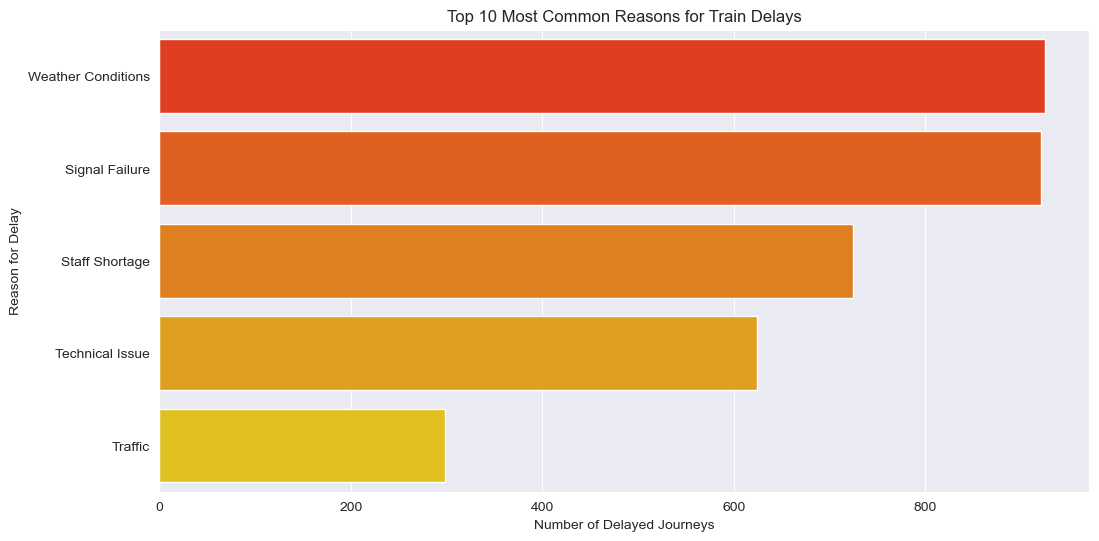

In [22]:
delay_reasons = df["Reason for Delay"].value_counts().drop("No Delay").head(10)
print("Most Common Reasons for Delays:")
print(delay_reasons)

plt.figure(figsize=(12, 6))
sns.barplot(x=delay_reasons.values, y=delay_reasons.index, palette="autumn")
plt.xlabel("Number of Delayed Journeys")
plt.ylabel("Reason for Delay")
plt.title("Top 10 Most Common Reasons for Train Delays")
plt.show()


## **<h1 style="color:red">Why did it happen?</h1>**

In [24]:
# Convert journey date to day of the week
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
df['Day of Week'] = df['Date of Journey'].dt.day_name()

# Convert departure time to hour for peak time analysis
df['Departure Hour'] = pd.to_datetime(df['Departure Time'], format='%H:%M:%S').dt.hour

# Analyze delays by day of the week
delay_by_day = df[df['Journey Status'] == 'Delayed']['Day of Week'].value_counts()

# Analyze delays by hour of the day
delay_by_hour = df[df['Journey Status'] == 'Delayed']['Departure Hour'].value_counts().sort_index()

# Refund Requests by Reason for Delay

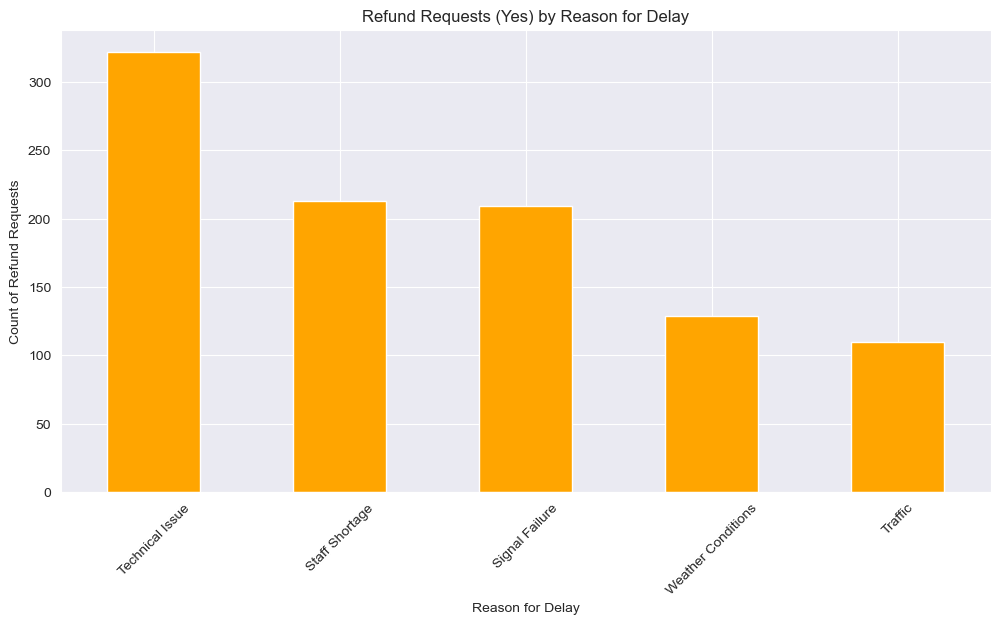

In [26]:
plt.figure(figsize=(12, 6))

refund_delay = df[df["Refund Request"] == "Yes"]["Reason for Delay"].value_counts()

refund_delay = refund_delay.drop("No Delay", errors="ignore")

refund_delay = refund_delay.sort_values(ascending=False)

refund_delay.plot(kind="bar", color="orange")

plt.xlabel("Reason for Delay")
plt.ylabel("Count of Refund Requests")
plt.title("Refund Requests (Yes) by Reason for Delay")
plt.xticks(rotation=45)

plt.show()


# Refund Requests by Journey Status

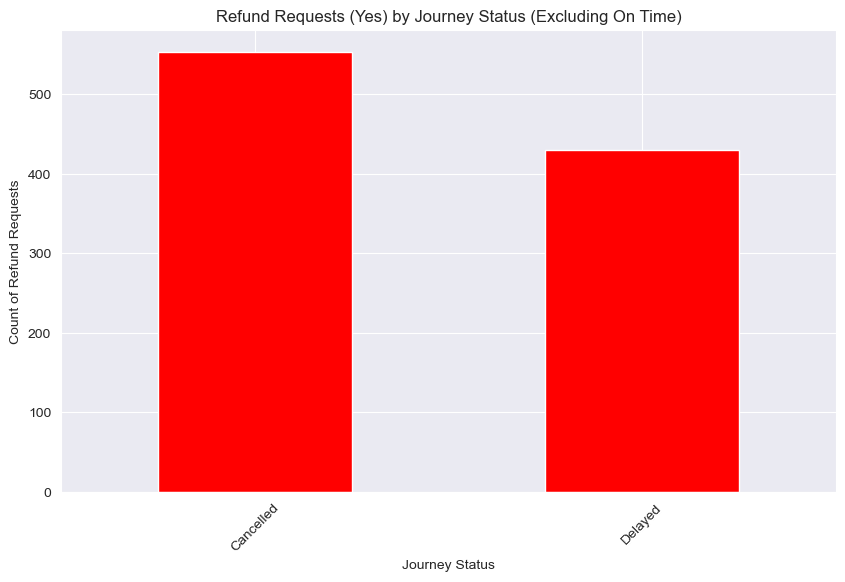

In [28]:
plt.figure(figsize=(10, 6))

filtered_df = df[df["Journey Status"] != "On Time"]

refund_journey = filtered_df[filtered_df["Refund Request"] == "Yes"]["Journey Status"].value_counts()

refund_journey = refund_journey.sort_values(ascending=False)

refund_journey.plot(kind="bar", color="red")

plt.xlabel("Journey Status")
plt.ylabel("Count of Refund Requests")
plt.title("Refund Requests (Yes) by Journey Status (Excluding On Time)")
plt.xticks(rotation=45)
plt.show()


# Delays by day?

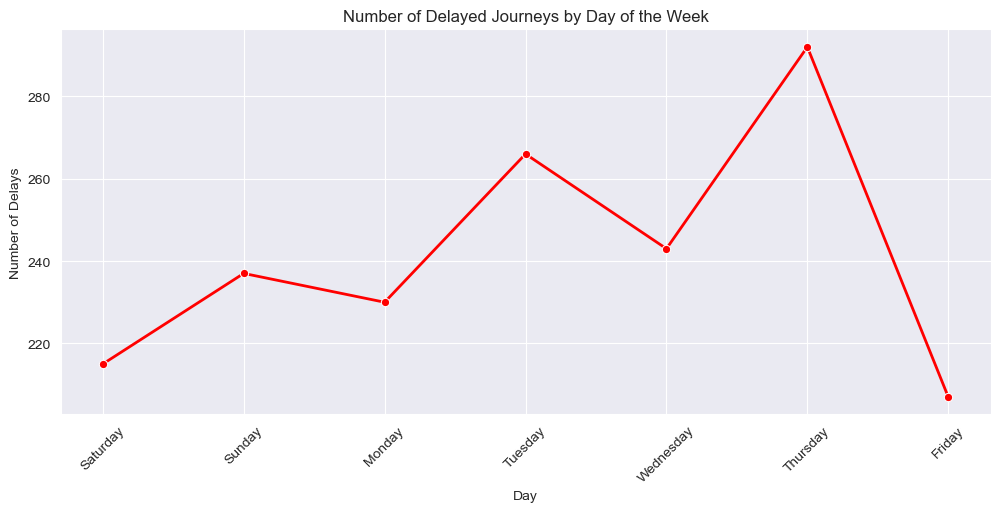

In [30]:
days_order = ["Saturday", "Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# Reorder the index based on the correct day sequence
delay_by_day = delay_by_day.reindex(days_order)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=delay_by_day.index, y=delay_by_day.values, marker="o", color="red", linewidth=2)

# Labels and title
plt.title('Number of Delayed Journeys by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45)

# Show plot
plt.show()

# Delays by time?

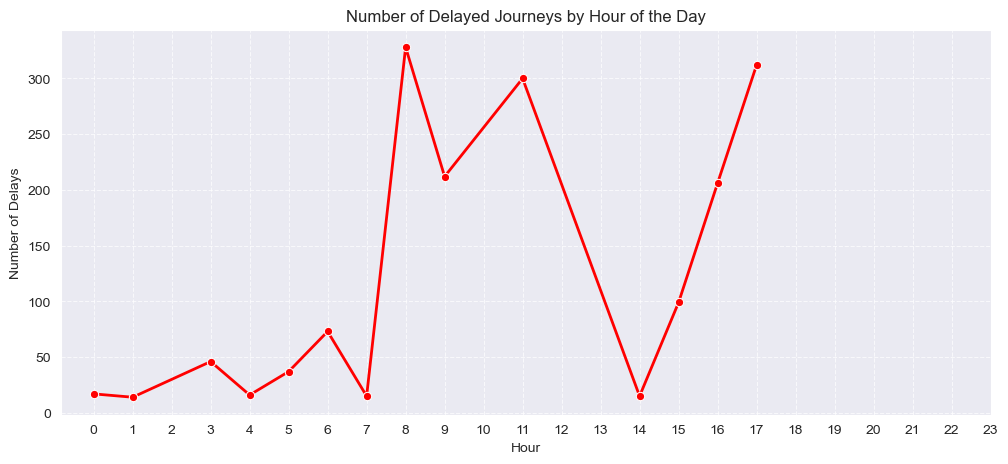

In [32]:
plt.figure(figsize=(12, 5))
delay_by_hour = delay_by_hour.sort_index()
sns.lineplot(x=delay_by_hour.index, y=delay_by_hour.values, marker='o', linestyle='-', color='red', linewidth=2)
plt.title('Number of Delayed Journeys by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Delays')
plt.xticks(range(0, 24))  
plt.grid(True, linestyle='--', alpha=0.7) 

# Show the plot
plt.show()

# Ticket type and refund likelihood?

Refund Request Count by Ticket Type:
Refund Request     No  Yes
Ticket Type               
Advance         16678  592
Anytime          4578   78
Off-Peak         7859  313


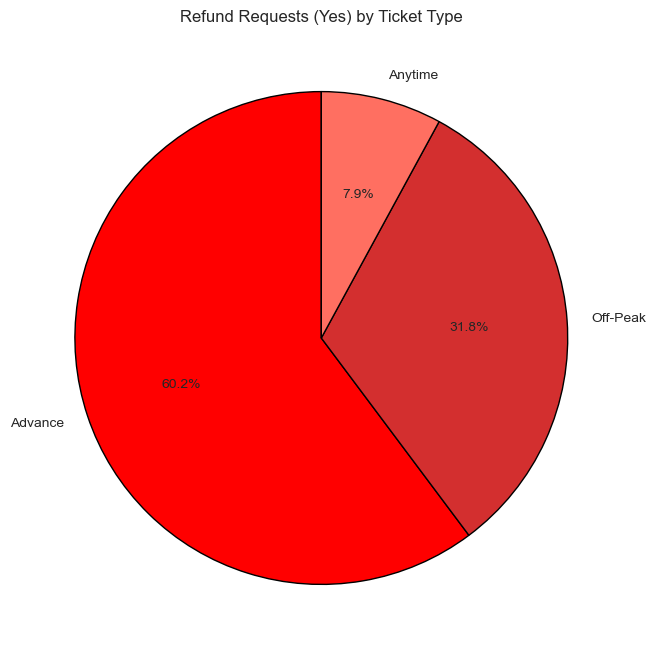

In [90]:
refund_by_type_count = pd.crosstab(df['Ticket Type'], df['Refund Request'])
print("Refund Request Count by Ticket Type:")
print(refund_by_type_count)

plt.figure(figsize=(8, 8))
refund_yes_ratio = df[df['Refund Request'] == 'Yes']['Ticket Type'].value_counts(normalize=True) * 100
colors = ['#FF0000', '#D32F2F', '#FF6F61']
refund_yes_ratio.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Refund Requests (Yes) by Ticket Type')
plt.ylabel("")
plt.show()



# Online vs. station ticket prices?

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3904\3683843288.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Purchase Type", y="Price", data=df, palette=colors, showfliers=True)


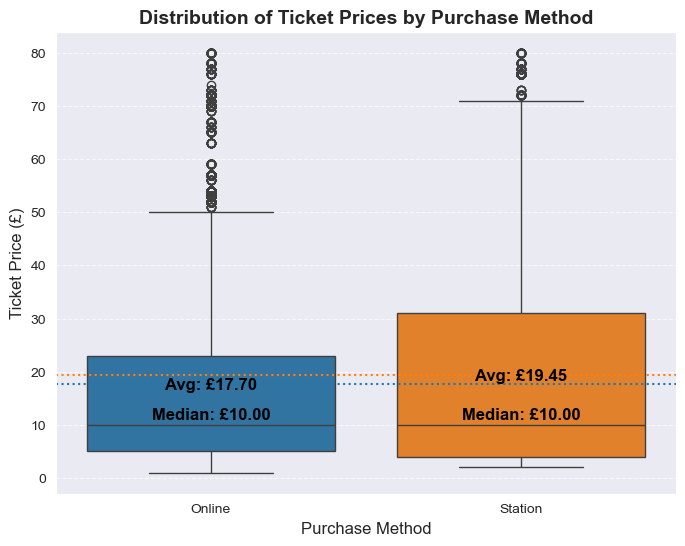

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.boxplot(x="Purchase Type", y="Price", data=df, palette=colors, showfliers=True)

median_values = df.groupby("Purchase Type")["Price"].median()

mean_values = df.groupby("Purchase Type")["Price"].mean()

for i, mean in enumerate(mean_values):
    plt.axhline(mean, color=colors[i], linestyle='dotted', linewidth=1.5)  # خط متوسط

for i, (median, mean) in enumerate(zip(median_values, mean_values)):
    plt.text(i, median + 1, f'Median: £{median:.2f}', ha='center', fontsize=12, color="black", fontweight='bold')
    plt.text(i, mean - 1, f'Avg: £{mean:.2f}', ha='center', fontsize=12, color="black", fontweight='bold')

plt.title("Distribution of Ticket Prices by Purchase Method", fontsize=14, fontweight='bold')
plt.xlabel("Purchase Method", fontsize=12)
plt.ylabel("Ticket Price (£)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Ticket price vs. delay likelihood?

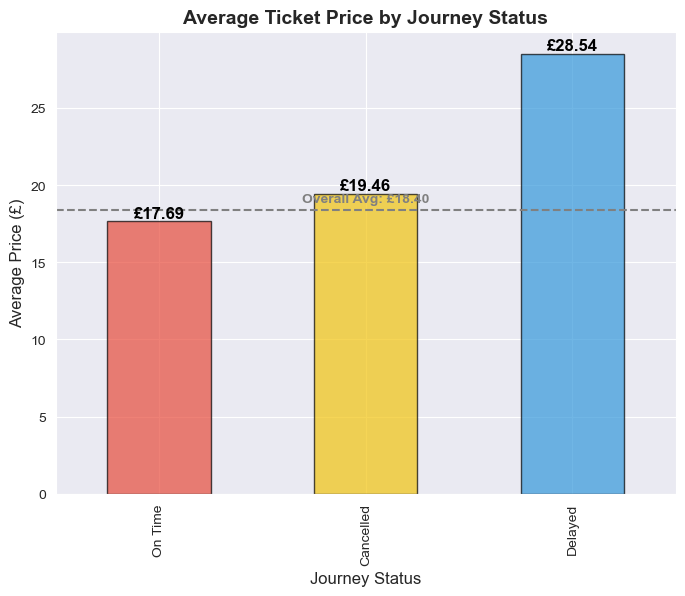

In [110]:
# Calculate average ticket price by journey status
price_by_journey_status = df.groupby('Journey Status')['Price'].mean()

# Plot average ticket prices for delayed and on-time journeys
plt.figure(figsize=(8, 5))
sns.barplot(x=price_by_journey_status.index, y=price_by_journey_status.values, palette='coolwarm')
plt.title('Average Ticket Price by Journey Status')
plt.xlabel('Journey Status')
plt.ylabel('Average Price (£)')
plt.show()

# Payment method and ticket type?

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_3904\3048329506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Payment Method", y="Price", data=df, palette="coolwarm")


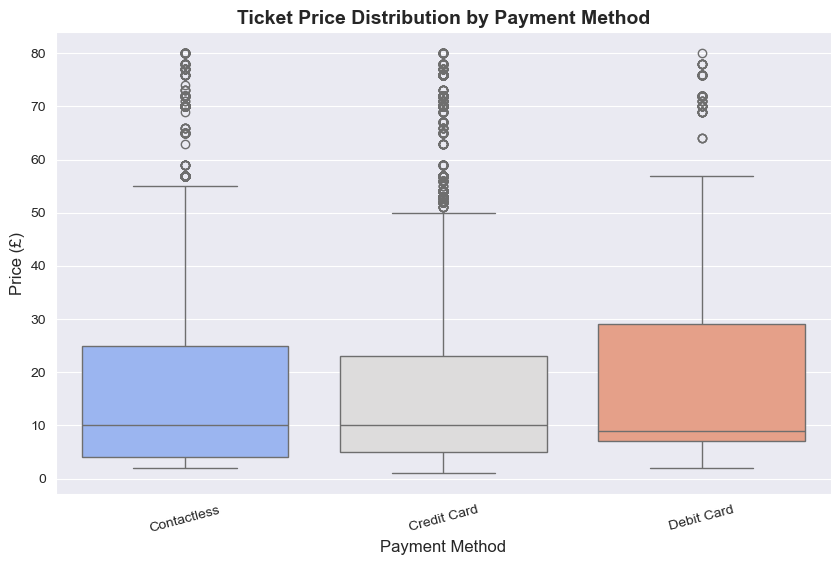

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Payment Method", y="Price", data=df, palette="coolwarm")

# Labels & Title
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Price (£)", fontsize=12)
plt.title("Ticket Price Distribution by Payment Method", fontsize=14, fontweight="bold")
plt.xticks(rotation=15)

plt.show()
